<a href="https://colab.research.google.com/github/marcaualex/DSIP/blob/main/Sarah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loanDf=pd.read_csv("train.csv")
loanDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y


In [19]:
data=loanDf
cat_vars=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Credit_History']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,5)

data=data[to_keep].dropna()
data_X=data.drop(['Loan_Status','Loan_ID'],axis=1)
data_y=data['Loan_Status']

data_X.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Credit_History_0           0
Credit_History_1           0
dtype: int64

In [73]:
data_X.columns
'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Dependents_0','Dependents_3+','Dependents_2', 'Gender_Female', 'Gender_Male', 'Married_No','Education_Graduate', 'Education_Not Graduate','Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban'


('ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Dependents_0',
 'Dependents_3+',
 'Dependents_2',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Urban')

In [74]:
rfe = rfe.fit(data_X, data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False  True False
 False False False False False  True False  True  True]
[17 16 15 14 11  1  5 13 10  6  1  3  7  2  9 12  4  1  8  1  1]


In [76]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [78]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[ 23  28]
 [  7 127]]
              precision    recall  f1-score   support

           N       0.77      0.45      0.57        51
           Y       0.82      0.95      0.88       134

    accuracy                           0.81       185
   macro avg       0.79      0.70      0.72       185
weighted avg       0.80      0.81      0.79       185



In [80]:
data_X2=data_X.drop(['Self_Employed_No','Self_Employed_Yes','Gender_Female','Gender_Male'],axis=1)
data_X2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0',
       'Credit_History_1'],
      dtype='object')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data_X2, data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [82]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[ 23  28]
 [  6 128]]
              precision    recall  f1-score   support

           N       0.79      0.45      0.58        51
           Y       0.82      0.96      0.88       134

    accuracy                           0.82       185
   macro avg       0.81      0.70      0.73       185
weighted avg       0.81      0.82      0.80       185



In [84]:
data_X2['total_income']=data_X2['ApplicantIncome']+data_X2['CoapplicantIncome']
loanDf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

AttributeError: ignored

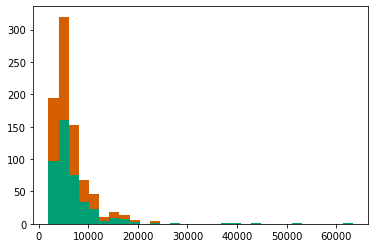

In [98]:
import matplotlib.pyplot as plt 

loanDf['total_income']=loanDf['ApplicantIncome']+loanDf['CoapplicantIncome']
take_loan=list(loanDf[loanDf['Loan_Status']=='Y']['total_income'])
not_take_loan=list(loanDf[loanDf['Loan_Status']=='Y']['total_income'])
colors = ['#009E73', '#D55E00']
plt.hist([take_loan,not_take_loan], 30,stacked=True,color=colors,normed=True)
plt.legend()


In [99]:
X_train, X_test, y_train, y_test = train_test_split(data_X2.drop(['ApplicantIncome','CoapplicantIncome'],axis=1), data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [100]:
data_X2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0',
       'Credit_History_1', 'total_income'],
      dtype='object')

In [101]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[ 22  29]
 [  4 130]]
              precision    recall  f1-score   support

           N       0.85      0.43      0.57        51
           Y       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185

